# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [1]:
using Clustering, CSV, DataFrames, Gadfly

## 讀取資料

In [2]:
data = CSV.read("data//s1-set.csv")
first(data, 10)

10×2 DataFrame
│ Row │ x      │ y      │
│     │ Int64  │ Int64  │
├─────┼────────┼────────┤
│ 1   │ 664159 │ 550946 │
│ 2   │ 665845 │ 557965 │
│ 3   │ 597173 │ 575538 │
│ 4   │ 618600 │ 551446 │
│ 5   │ 635690 │ 608046 │
│ 6   │ 588100 │ 557588 │
│ 7   │ 582015 │ 546191 │
│ 8   │ 604678 │ 574577 │
│ 9   │ 572029 │ 518313 │
│ 10  │ 604737 │ 574591 │

## 用 k-means 去對資料做分群

### 資料轉置

In [3]:
X = Matrix(data[:, 1:2])'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

### k-means 分群

In [4]:
k = 15
result = kmeans(X, k)

KmeansResult{Array{Float64,2},Float64,Int64}([369091.3288490284 852058.4525993884 … 141004.54285714286 823650.6918238994; 481230.67563527654 157685.52293577982 … 557993.22 730928.072327044], [6, 6, 6, 6, 6, 6, 6, 6, 6, 6  …  3, 3, 13, 13, 3, 13, 3, 13, 13, 13], [3.868603093541992e9, 3.784863740838379e9, 8.956930531298828e7, 6.740235058618164e8, 1.976029744717041e9, 6.258253758146973e8, 1.402054662494873e9, 3.6132858852539062e6, 4.345366158831543e9, 3.3965333364257812e6  …  3.6661407074121094e8, 1.7301978160527344e9, 1.3690730781669922e9, 2.254881993486328e8, 2.0261418003969727e9, 5.7113251482910156e7, 8.976563416430664e8, 3.973197627734375e8, 4.297473142249512e9, 4.168595082060547e8], [669, 327, 122, 351, 314, 297, 335, 341, 340, 316, 340, 349, 231, 350, 318], [669, 327, 122, 351, 314, 297, 335, 341, 340, 316, 340, 349, 231, 350, 318], 1.3495468956765648e13, 7, true)

### 存回分群後的分類

In [5]:
data[!, :cluster] = string.(assignments(result));

### 群中心

In [6]:
result.centers

2×15 Array{Float64,2}:
 3.69091e5  8.52058e5       6.84591e5  …  6.64058e5  1.41005e5  8.23651e5
 4.81231e5  1.57686e5  893037.0           8.46508e5  5.57993e5  7.30928e5

### 視覺化分群結果

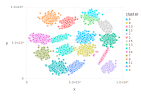

In [7]:
plot(data, x="x", y="y", color = "cluster", Geom.point)